# KP Ads Initial Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Load Data

In [2]:
ads_df = pd.read_csv("../data/processed/ads.csv")

In [3]:
ads_df.shape

(36135, 11)

In [4]:
ads_df.columns

Index(['url', 'name', 'description', 'category', 'sub_category', 'posted_at',
       'price', 'currency', 'city', 'latitude', 'longitude'],
      dtype='object')

In [5]:
ads_df.head()

,url,name,description,category,sub_category,posted_at,price,currency,city,latitude,longitude
0,/konzole-i-igrice/xbox-delovi-i-oprema/dzojsti...,Džojstik xbox,Idu bez baterija ispravni su,konzole-i-igrice,xbox-delovi-i-oprema,2020-04-26T08:50:24.000Z,4.000,rsd,Trstenik,43.617379,21.002300
1,/obuca-muska/patike/jordan-patike-novo-ss/ogla...,Jordan patike novo ss,Novo Brojevi 36 do 41 Nisu original Robu šalje...,obuca-muska,patike,2020-04-26T08:50:28.000Z,2.800,rsd,Aleksandrovac,43.460472,21.048953
2,/automobili-delovi-i-alati/automobili-za-delov...,Mercedes CLK w208 delovi-povoljno,Kompletan auto u delovima: -motor 2.0 benzinac...,automobili-delovi-i-alati,automobili-za-delove,2020-04-26T08:50:30.000Z,"10,00",eur,Leskovac,42.996376,21.944034
3,/nega-lica-tela-i-ulepsavanje/parfemi-zenski/n...,Nero assoluto Roberto Cavalli TESTER,TESTERI se ne proizvode u luksuznim pakovanjim...,nega-lica-tela-i-ulepsavanje,parfemi-zenski,2020-04-26T08:50:30.000Z,3.500,rsd,Pančevo,44.874000,20.647567
4,/kompjuteri-laptop-i-tablet/laptopovi/hp-elite...,HP EliteBook 8460p,Dobro očuvan i ispravan laptop sa originalnim ...,kompjuteri-laptop-i-tablet,laptopovi,2020-04-26T08:50:33.000Z,"120,00",eur,Beograd | Voždovac,44.776182,20.477074


In [6]:
ads_df.isna().any()

url             False
name            False
description     False
category        False
sub_category    False
posted_at       False
price           False
currency         True
city            False
latitude        False
longitude       False
dtype: bool

As currency has `null` values, we should search for these missing values in ad name and description. Otherwise, we should analyize price and determine whether currency is RSD or EUR.

In [7]:
ads_df.currency.isna().sum()

1217

In [8]:
null_currency = ads_df[ads_df.isna().values]
null_currency.head()

,url,name,description,category,sub_category,posted_at,price,currency,city,latitude,longitude
5,/automobili-delovi-i-alati/auto-razni-delovi/o...,Opel Astra G 1.6 delovi povoljno,Delovi za Opel Astru G 1.6 2003 god. Kompletan...,automobili-delovi-i-alati,auto-razni-delovi,2020-04-26T08:50:35.000Z,Kontakt,NaN,Leskovac,42.996376,21.944034
20,/poljoprivreda-domace-zivotinje/ovce/koze/ogla...,Koze,3 koze 5 jareta Moguca zamena za ovce,poljoprivreda-domace-zivotinje,ovce,2020-04-26T08:51:44.000Z,Dogovor,NaN,Smederevo,44.665894,20.933517
47,/automobili-delovi-i-alati/auto-motorna-grupa/...,fiat stilo 1.2 16v benzinske dizne,Veliki izbor polovnih i novih mehaničkih i lim...,automobili-delovi-i-alati,auto-motorna-grupa,2020-04-26T08:52:35.000Z,Dogovor,NaN,Šabac,44.748861,19.690788
81,/dvoriste-i-basta/rostilji-sacevi-i-kotlici/in...,INOX makaze za meso secka LUX 400SM,Dimenzije na slici 400x50x9mm! Masa: 6 kg! I N...,dvoriste-i-basta,rostilji-sacevi-i-kotlici,2020-04-26T08:54:06.000Z,Pozvati,NaN,Zrenjanin,45.381561,20.368574
125,/automobili-delovi-i-alati/auto-razni-delovi/g...,Golf2,Golf2 dizel registeovan do decembra Auto potpu...,automobili-delovi-i-alati,auto-razni-delovi,2020-04-26T08:55:58.000Z,Dogovor,NaN,Požarevac,44.620835,21.184205


As we can see, ads without currency are ads without listed price. That means price is negotiable. We should create a separate indicator for such ads.

## Ads per Category

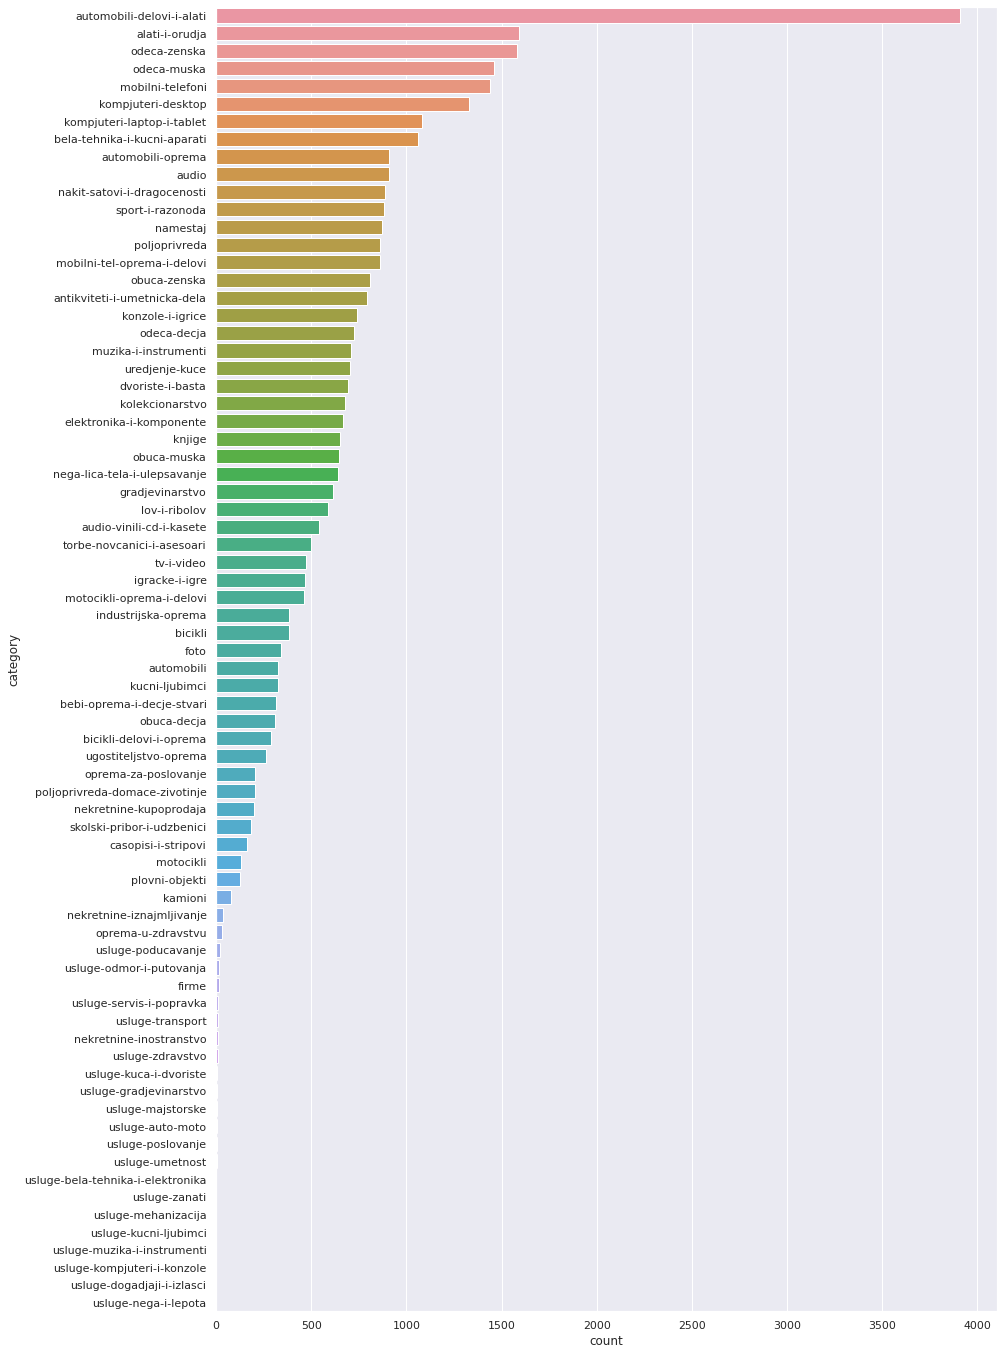

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches((14, 24))
sns.countplot(data=ads_df, y="category", order=ads_df.category.value_counts().index, orient="v", ax=ax)
plt.show()

## Ads per City

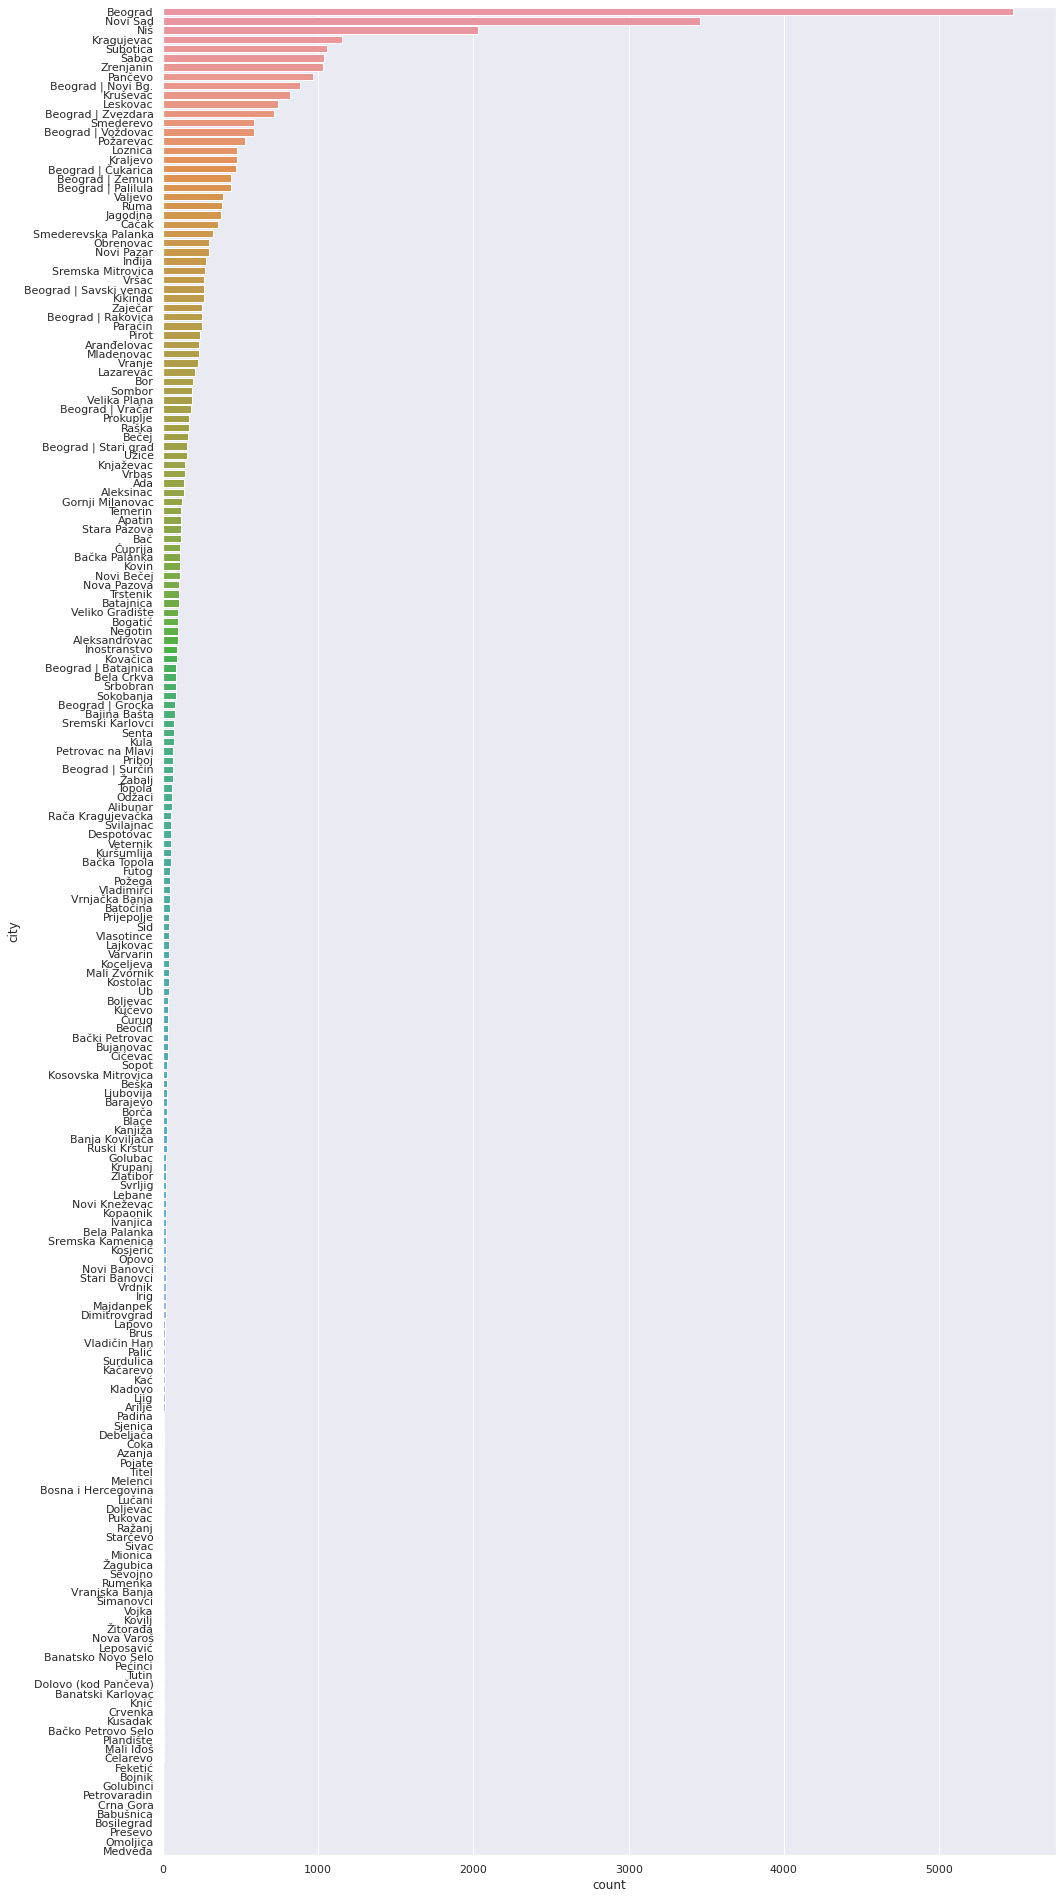

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches((16, 34))
sns.countplot(data=ads_df, y="city", order=ads_df.city.value_counts().index, orient="v", ax=ax)
plt.show()

Some city names are compound, in form of `City | City Area` like `Belgrade | Zemun`. We might split such city names to either `city` or `city_area`, e.g. `Belgrade` or `Zemun`.

## Ad Name and Description

In [11]:
ad_name_lengths = list(map(len, ads_df.name.str.split()))

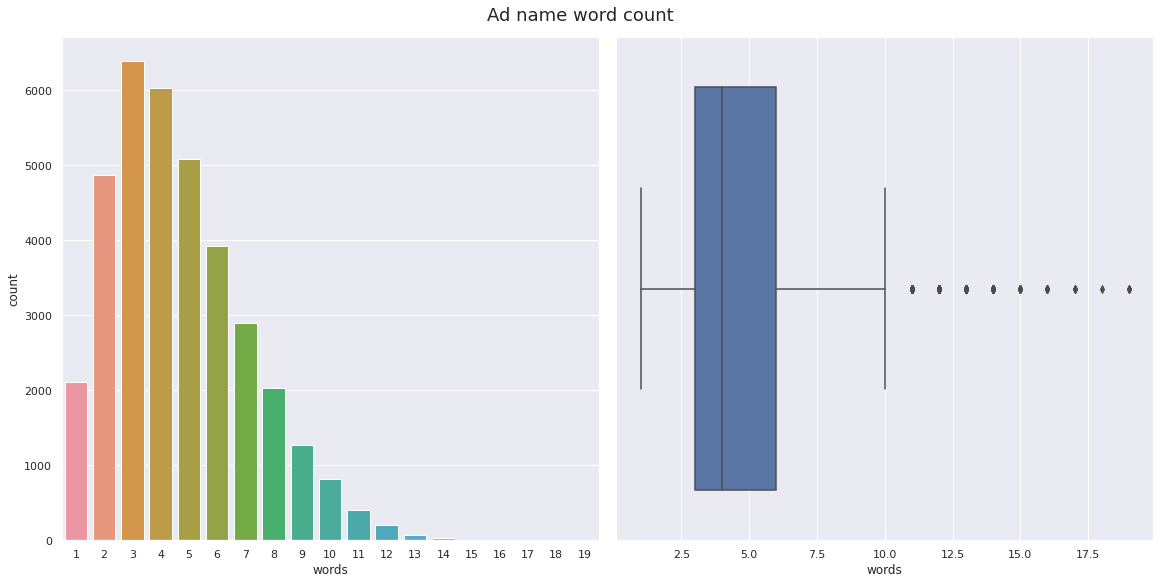

In [12]:
fig, axes = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches((16, 8))

fig.suptitle("Ad name word count", fontsize=18)

sns.countplot(ad_name_lengths, ax=axes[0])
axes[0].set_xlabel("words")

sns.boxplot(ad_name_lengths, ax=axes[1])
axes[1].set_xlabel("words")

plt.show()

In [13]:
ad_description_lengths = list(map(len, ads_df.description.str.split()))

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(ad_description_lengths))
np_ad_description_lengths = np.array(ad_description_lengths)

ad_description_lengths = np_ad_description_lengths[z > 3]

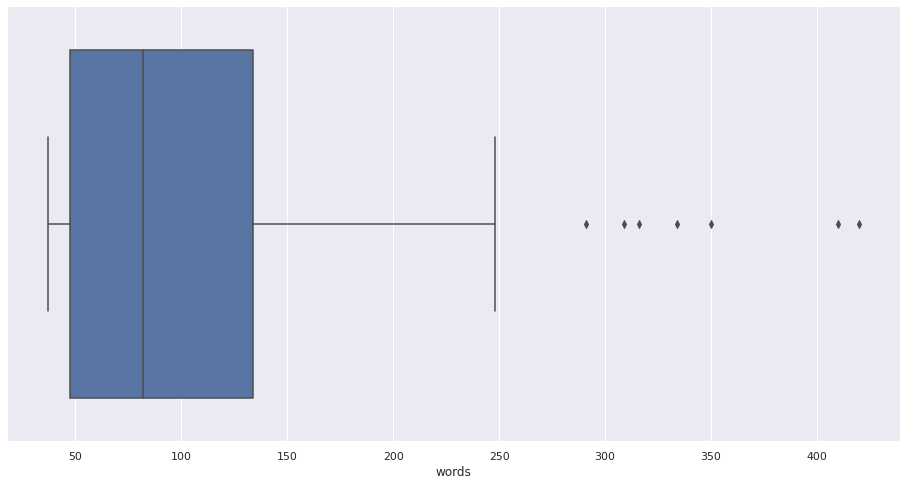

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches((16, 8))

sns.boxplot(ad_description_lengths, ax=ax)
ax.set_xlabel("words")

plt.show()

Summary stats before removing z-score outlier

In [15]:
print("mean:", np.mean(np_ad_description_lengths))
print("std:", np.std(np_ad_description_lengths))
print("median:", np.median(np_ad_description_lengths))
print("mode:", stats.mode(np_ad_description_lengths).mode[0])
print("min", np.min(np_ad_description_lengths))
print("max", np.max(np_ad_description_lengths))

mean: 9.888501452885015
std: 9.020294097964468
median: 10.0
mode: 11
min 1
max 420
